<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/machine-learning/ML_Aula3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PÓS GRADUAÇÃO EM ENGENHARIA DE SOFTWARE - PUC - RIO
## MVP - Qualidade, Segurança e Sistemas Inteligentes
## Análise de Crédito com Inteligência Artificial
Aluno:  **Marialdo Ramalho Ferreira**

**Dataset**: "https://raw.githubusercontent.com/MarialdoFerreira/mvp-qua-seg-inteligencia-back/refs/heads/main/credito-preprocessado.csv"

## Configuração do ambiente

In [5]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from joblib import Parallel, delayed

## Carga do Dataset

O dataset contém informações sobre clientes de uma instituição financeira. O objetivo sera fazer a predição da coluna **Predição de crédito**"**, indicando a possibilidade do cliente ficar adimplente(predicao_credito = 0), ou inadimplente (predicao_credito = 1), com base nas observações de dados semelhantes a do cliente.

Descrição de Cada Coluna

 - idade:                   Idade.
 - sexo:                    Sexo.
 - dependentes:             Número de dependentes. 
 - escolaridade:            Escolaridade.
 - estado_civil:            Estado civil.
 - salario_anual:           Salário anual.
 - tipo_cartao:             Tipo de cartão.
 - meses_de_relacionamento: Número de meses de relacionamento. 
 - qtd_produtos:            Quantidade de produtos. 
 - iteracoes_12m:           Iterações em 12 meses. 
 - meses_inativo_12m:       Número de meses inativos. 
 - limite_credito:          Limite de crédito.
 - valor_transacoes_12m:    Valor da transações em 12 meses.
 - qtd_transacoes_12m:      Quantidades de transações em 12 meses. 
 - predicao_credito         Predição: 0 - indicando Adimplência e 1 - indicando Inadimplência. 

O objetivo é fazer a predição se o cliente pode Inadimplir.	

In [6]:
# Lê o Dataset tratado pelo notebook de "manipulacao_de_dados_credito.ipynb" 
dataset = pd.read_csv('https://raw.githubusercontent.com/MarialdoFerreira/mvp-qualy-seg-inteligencia-back/refs/heads/main/MachineLearning/data/credito-preprocessado.csv', delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m,predicao_credito
0,45,1,3,0,2,2,0,39,5,3,1,12691.51,1144.90,42,0
1,49,0,5,1,0,0,0,44,6,2,1,8256.96,1291.45,33,0
2,51,1,3,1,2,3,0,36,4,0,1,3418.56,1887.72,20,0
3,40,0,4,0,3,0,0,34,3,1,4,3313.03,1171.56,20,0
4,40,1,3,2,2,2,0,21,5,0,1,4716.22,816.08,28,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    10127 non-null  int64  
 1   sexo                     10127 non-null  int64  
 2   dependentes              10127 non-null  int64  
 3   escolaridade             10127 non-null  int64  
 4   estado_civil             10127 non-null  int64  
 5   salario_anual            10127 non-null  int64  
 6   tipo_cartao              10127 non-null  int64  
 7   meses_de_relacionamento  10127 non-null  int64  
 8   qtd_produtos             10127 non-null  int64  
 9   iteracoes_12m            10127 non-null  int64  
 10  meses_inativo_12m        10127 non-null  int64  
 11  limite_credito           10127 non-null  float64
 12  valor_transacoes_12m     10127 non-null  float64
 13  qtd_transacoes_12m       10127 non-null  int64  
 14  predicao_credito      

## Separação em conjunto de treino e conjunto de teste com holdout

In [8]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:14]
y = array[:,14]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
# num_particoes = 10
num_particoes = 5
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.870881 (0.004050)
KNN: 0.864584 (0.008553)
CART: 0.914455 (0.005055)
NB: 0.861993 (0.008777)
SVM: 0.839279 (0.000280)
Bagging: 0.942723 (0.004563)
RF: 0.945562 (0.005205)
ET: 0.923837 (0.005838)
Ada: 0.938403 (0.005327)
GB: 0.947290 (0.003681)
Voting: 0.889027 (0.003809)


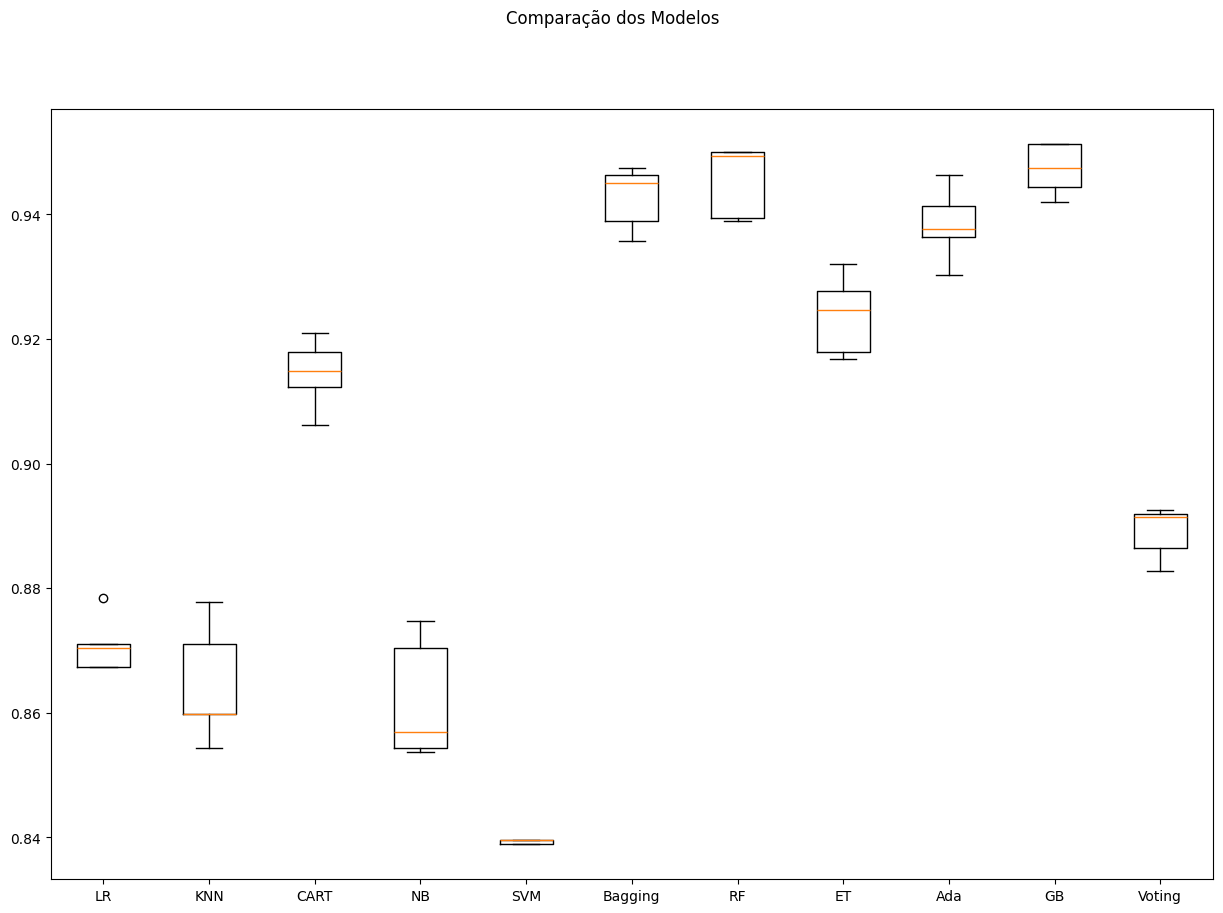

In [9]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

Trabalhando com dados pontencialmente desbalanceados ou sensíveis a escala

StandardScaler (padronização do conjunto de dados) e MinMaxScaler (normalização do conjunto de dados) são duas técnicas de normalização/escala usadas em machine learning para pré-processamento de dados e são úteis para preparar dados para algoritmos de aprendizado de máquina que são sensíveis à escala dos dados.

##### StandardScaler
StandardScaler padroniza os dados, ou seja, remove a média e escala os dados para que tenham uma variância unitária. Ele transforma os dados para que a média de cada feature seja 0 e a variância seja 1.

Fórmula: $z_i=\frac{x_i-\mu}{\sigma}$

 
onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $\mu$ é a média dos valores da feature.
- $\sigma$ é o desvio padrão dos valores da feature.
𝑥
x é o valor original da feature.
𝜇
μ é a média dos valores da feature.
𝜎
σ é o desvio padrão dos valores da feature.


##### MinMaxScaler
MinMaxScaler escala e transforma os dados para um intervalo específico, geralmente entre 0 e 1. Ele transforma os dados para que o menor valor de uma feature seja 0 e o maior valor seja 1.

Fórmula: $z_i=\frac{x_i-min(x)}{max(x)-min(x)}$

onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $min(x)$ é o menor valor da feature.
- $max(x)$ é o maior valor da feature.

Nós vamos aplicar essas técnicas para os dados do dataset de diabetes através da construção de pipelines. Pipelines são uma maneira de simplificar o processo de construção de modelos, permitindo que você execute várias etapas de pré-processamento e modelagem em sequência.

LR-orig: 0.871 (0.004)
KNN-orig: 0.865 (0.009)
CART-orig: 0.914 (0.005)
NB-orig: 0.862 (0.009)
SVM-orig: 0.839 (0.000)
Bag-orig: 0.943 (0.005)
RF-orig: 0.946 (0.005)
ET-orig: 0.924 (0.006)
Ada-orig: 0.938 (0.005)
GB-orig: 0.947 (0.004)
Vot-orig: 0.889 (0.004)
LR-padr: 0.876 (0.005)
KNN-padr: 0.883 (0.003)
CART-padr: 0.916 (0.003)
NB-padr: 0.861 (0.007)
SVM-padr: 0.902 (0.005)
Bag-padr: 0.942 (0.004)
RF-padr: 0.944 (0.004)
ET-padr: 0.923 (0.008)
Ada-padr: 0.938 (0.005)
GB-padr: 0.947 (0.004)
Vot-padr: 0.907 (0.004)
LR-norm: 0.876 (0.004)
KNN-norm: 0.869 (0.008)
CART-norm: 0.915 (0.005)
NB-norm: 0.861 (0.007)
SVM-norm: 0.892 (0.007)
Bag-norm: 0.942 (0.003)
RF-norm: 0.944 (0.007)
ET-norm: 0.924 (0.007)
Ada-norm: 0.938 (0.005)
GB-norm: 0.947 (0.004)
Vot-norm: 0.898 (0.006)


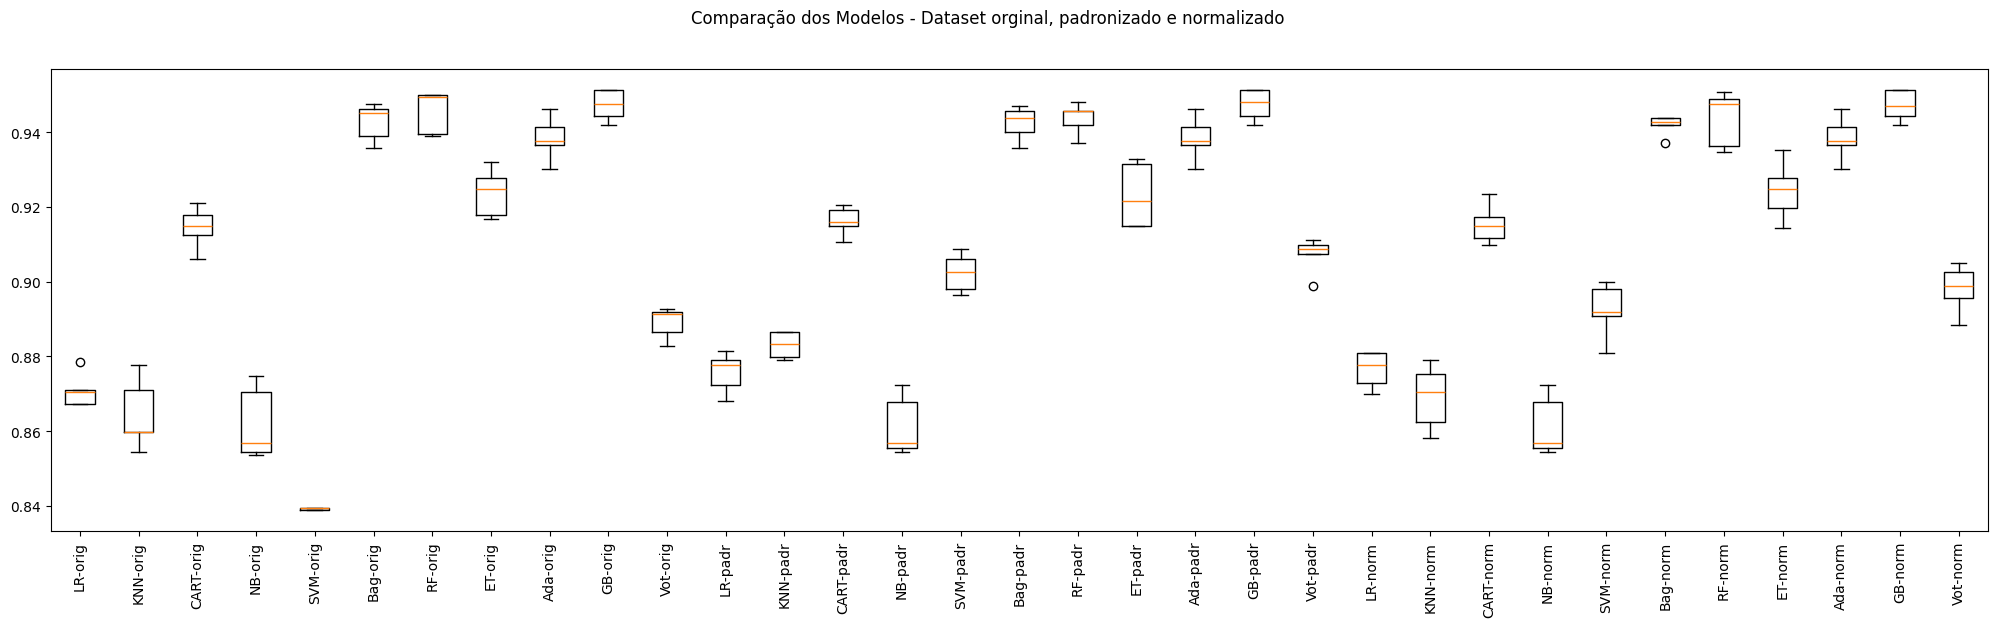

In [10]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline
# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines
# A ordem de execução é da esquerda para a direita.

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

A otimização de hiperparâmetros é o processo de encontrar os valores ideais para os hiperparâmetros de um modelo de machine learning. O objetivo é encontrar a combinação de hiperparâmetros que resulta no melhor desempenho do modelo.


##### Grid Search (*força bruta*)

Como Funciona o Grid Search?
1. Definição do Espaço de Hiperparâmetros: Primeiro, define-se um conjunto de valores possíveis para cada hiperparâmetro.
2. Avaliação das Combinações: Em seguida, cada combinação possível desses valores é avaliada.
3. Seleção do Melhor Conjunto: A combinação de hiperparâmetros que produz o melhor desempenho é selecionada.

In [11]:
np.random.seed(7)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [0.1, 1, 10, 100],
        'SVM__kernel': ['rbf']
    #    'SVM__kernel': ['linear', 'rbf']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1, verbose=2)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))
    
#It took 16m 42.3s apos remover linear do kernel do parametros do SVM, pois não estava terminando o processamento

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Modelo: LR-orig - Melhor: 0.871868 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Modelo: LR-padr - Melhor: 0.878287 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Modelo: LR-norm - Melhor: 0.878411 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
Fitting 5 folds for each of 33 candidates, totalling 165 fits
Modelo: KNN-orig - Melhor: 0.879892 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}
Fitting 5 folds for each of 33 candidates, totalling 165 fits
Modelo: KNN-padr - Melhor: 0.888903 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
Fitting 5 folds for each of 33 candidates, totalling 165 fits
Modelo: KNN-norm - Melhor: 0.878534 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Modelo: CART-orig - Melhor: 0.9298

In [12]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)) 

Sem tratamento de missings: knn-orig - Melhor: 0.879892 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}
Sem tratamento de missings: knn-padr - Melhor: 0.888903 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
Sem tratamento de missings: knn-norm - Melhor: 0.878534 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}


## Finalização do Modelo

In [13]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# Modelo: RF-padr - Melhor: 0.946181 usando {'RF__max_depth': 20, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 10, 'RF__n_estimators': 100}

np.random.seed(7)

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = RandomForestClassifier(n_estimators=100, 
                               max_features='log2',
                               min_samples_split=10,
                               max_depth=20,
                               min_samples_leaf=1)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9279368213228035


Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados.

In [14]:
np.random.seed(7)

model = RandomForestClassifier(n_estimators=100, 
                               max_features='log2',
                               min_samples_split=10,
                               max_depth=20,
                               min_samples_leaf=1)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('RF', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9279368213228035


## Salvando os arquivos

In [15]:
# Salvando o modelo
model_filename = 'rf_credito_classifier.pkl'
with open("../models/"+model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
scaler_filename = 'minmax_scaler_credito.pkl'
with open("../scalers/"+scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
    
# Salvando o pipeline
pipeline_filename = 'rf_credito_pipeline.pkl'
with open("../pipelines/"+pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)
    
## Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("../data/X_test_dataset_credito.csv", index=False)
y_test_df.to_csv("../data/y_test_dataset_credito.csv", index=False)


## Simulando a aplicação do modelo em dados não vistos

In [16]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y)


RandomForestClassifier(max_depth=20, max_features='log2', min_samples_split=10)

In [17]:
# Novos dados - não sabemos a classe!
data = {'idade': [42, 57, 66],
        'sexo': [0, 0, 1],
        'dependentes': [1, 0, 3],
        'escolaridade': [0, 1, 4],
        'estado_civil': [2, 0, 1],
        'salario_anual': [0, 1, 2],
        'tipo_cartao': [2, 0, 1],
        'meses_de_relacionamento': [36, 49, 56],
        'qtd_produtos': [2, 3, 5],
        'iteracoes_12m': [3, 2, 3],
        'meses_inativo_12m': [3, 3, 4],
        'limite_credito': [15433.35, 7882.47, 3672.19],
        'valor_transacoes_12m': [966.80, 1464.46, 704.78],
        'qtd_transacoes_12m': [22, 28, 16],
        }

atributos = ['idade', 'sexo', 'dependentes', 'escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao', 'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m', 'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m', 'qtd_transacoes_12m']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:14].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[0.34042553 0.         0.2        0.         0.66666667 0.
  0.66666667 0.53488372 0.2        0.5        0.5        0.42308879
  0.0254045  0.09302326]
 [0.65957447 0.         0.         0.25       0.         0.25
  0.         0.8372093  0.4        0.33333333 0.5        0.19482064
  0.05309108 0.13953488]
 [0.85106383 1.         0.6        1.         0.33333333 0.5
  0.33333333 1.         0.8        0.5        0.66666667 0.06754106
  0.0108274  0.04651163]]


In [18]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 0. 1.]


## Análise de resultados do modelo

O dataset observado extraido do site https://www.kaggle.com/code/eduardovbernardino/analise-de-dados-credito-ebac apresentava diversas dados em formato não adequado a análise pelos algoritmos de Machine Learning. Foi necessário fazer os devidos tratamentos e conversão para codigos númericos fazendo com que os algoritmos apresentassem resultados satisfatórios. O algoritmo RandomForest(RF) foi o que melhor apresentou resultado pelo metódo de Acurácia sobre os dados analisados e que foi embarcado no aplicativo online. 

O banco de dados existente na internet atualmente juntamente com os algoritmos de Machine Learning enriquecem a tecnologia da informação com dados amplos e informações precisas, proporcionando facilidade e inferência ao mundo real.  